In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, Image, display
from astropy.cosmology import FlatLambdaCDM

# 1. Friedmann universe

Let's remember what was the equation that determines the dynamics of the universe:

$\left( \frac{\dot{a}(t)}{a(t)} \right)^2 = \frac{8 \pi G}{3}\rho\left[a(t)\right] - \frac{kc^2}{R^2a^2(t)} + \frac{\Lambda c^2}{3}$

### 1.1 Cold-dark matter dominated

When the energy budget of the universe is dominated by cold matter, the equation is also easily solvable:

$\frac{da}{dt} =  \sqrt{\frac{8\pi G \rho_{R0}}{3}} \frac{1}{\sqrt{a}} \Rightarrow \int^{a}_{0} da \, a^{\frac{1}{2}} = \sqrt{\frac{8\pi G \rho_{R0}}{3}} \int^{t}_{0}dt \Rightarrow a^{\frac{3}{2}} = \frac{3}{2} \sqrt{\frac{8\pi G \rho_{R0}}{3}} t \Rightarrow a \propto t^{\frac{2}{3}}$

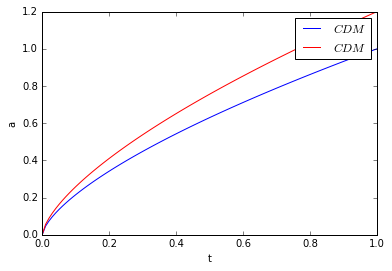

In [2]:
t = np.linspace(0,1,100)
a_cm  = t ** (2.0/3)
a_cm2  = 1.2 * t ** (2.0/3) 

plt.plot(t, a_cm,  'b', label='$CDM$')
plt.plot(t, a_cm2,  'r', label='$CDM$')

#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('t')
plt.ylabel('a')

### 1.2 Radiation-dominated universe

In a radiation-dominated universe, the Friedmann equation is very simple

$\frac{da}{dt} =  \sqrt{\frac{8\pi G \rho_{R0}}{3}} \frac{1}{a}$

and can be integrated analytically

$\int^{a}_{0} da \, a = \sqrt{\frac{8\pi G \rho_{R0}}{3}} \int^{t}_{0} dt \Rightarrow a = \sqrt{2\sqrt{\frac{8\pi G \rho_{R0}}{3}}} \sqrt{t} \Rightarrow a \propto t^{\frac{1}{2}}$

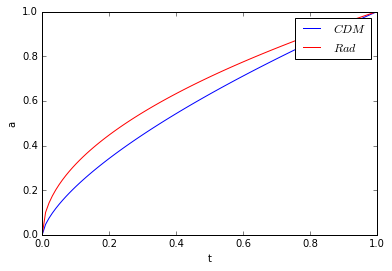

In [4]:
t = np.linspace(0,1,100)
a_cm  = t ** (2.0/3)
a_rad = t ** 0.5

plt.plot(t, a_cm,  'b', label='$CDM$')
plt.plot(t, a_rad, 'r', label='$Rad$')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel('t')
plt.ylabel('a')

### 1.3 Cosmological-constant-dominated universe

The last simplified case we will use now is one that is dominated by DE:

$\frac{da}{dt} =  \sqrt{\frac{\Lambda c^2}{3}} a \Rightarrow \int^{a}_{0}\frac{da}{a} = \sqrt{\frac{\Lambda c^2}{3}} \int^{t}_0 dt \Rightarrow a = \exp{\sqrt{\frac{\Lambda c^2}{3}} t}$

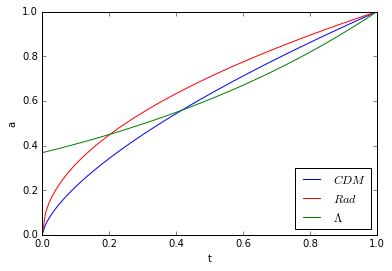

In [5]:
t = np.linspace(0,1,100)
a_cm  = t ** (2.0/3)
a_rad = t ** 0.5
a_lambda = np.exp(t) / np.exp(1.0)

plt.plot(t, a_cm,  'b', label='$CDM$')
plt.plot(t, a_rad, 'r', label='$Rad$')
plt.plot(t, a_lambda, 'g', label='$\Lambda$')
#plt.xscale('log')
#plt.yscale('log')
plt.legend(loc=4)
plt.xlabel('t')
plt.ylabel('a')

### 1.4 Solving a more realistic case numerically

The full Friedmann equation is more complicated, and has no analytical solution

$\frac{da}{dt} = \sqrt{\frac{8\pi G \rho_{M0}}{3} \frac{1}{a} + \frac{8\pi G \rho_{R0}}{3} \frac{1}{a^2} + \frac{\Lambda c^2}{3} a^2}$

In general, we can solve these equations relatively easily numerically. We can do so by transforming a differential equation into a differences equation:

$\frac{da}{dt} = f(a)$

$\frac{da}{dt} \approx \frac{f(a_{i}) - f(a_{i-1})}{t_{i} - t_{i-1}}$

We only need an initial condition to start, in our case $a=1$

$f(a_{i-1}) = f(a_i) - \frac{da}{dt} * (t_i - t_{i-1})$

In [6]:
def H(a, omega_m, omega_r, omega_l):
    return np.max((omega_m / a + omega_r / a**2 + omega_l * a**2)**0.5,0)

def step(a,dt,function,omega_m,omega_r,omega_l):
    slope = function(a,omega_m,omega_r,omega_l)
    return a - slope * dt

def intFLRW(dt,n,omega_m, omega_r, omega_l):
    a = []
    old_a = 1.0
    a.append(old_a)
    new_a = old_a
    for i in range(n):
        new_a = step(old_a,dt,H,omega_m,omega_r,omega_l)
        a.append(new_a)
        old_a = new_a
    return np.linspace(0,n*dt,n+1), np.array(a)

/Users/jzorrilla/Programs/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


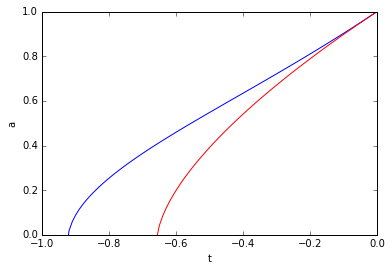

In [7]:
t1, a1 = intFLRW(0.01, 100, omega_m=0.20, omega_r=0.05, omega_l=0.75)
t2, a2 = intFLRW(0.01, 100, omega_m=0.95, omega_r=0.05, omega_l=0.00)

plt.plot(-t1,a1,'b')
plt.plot(-t2,a2,'r')
plt.ylim((0.0,1.0))
plt.xlabel('t')
plt.ylabel('a')

# 2. Some thermodynamics

## 2.1 Temperature

In thermodynamics, temperature is the property of a system that characterizes its thermal equilibrium. That is, if 2 isolated systems in equilibrium -i.e. their macroscopic properties do not change with time- are brought into thermal contact -i.e. no work can be exerted by anyone onto the other-, if their emperature was the same, their state does not change.

If their temperature was not the same, both temperatures will evolve until both reach a new equilibrium in which $T_A = T_B$

In the statistical-mechanics interpretation of thermodynamics, systems are a collection of particles, and their macroscopic states just an average over properties of their constituent particles. 

Temperature is just a measurement of the kinetic energy of the constituent particles.

$<U_K> = \frac{1}{N}\sum^N_{i=1}U^i_K=\frac{n}{2}k_B T$

Under this interpretation, systems in thermal contact are those whose particles can exchange kinetic energy.

This exchanges of kinetic energy, also happen between particles of the same system

## 2.2 Maxwell-Botzmann distribution

What is the distribution of velocities -kinetic energy- of a system in equilibrium?

For an ideal gas, that is, a system in which particles move freely and only interact with each other through collisions, that distribution is a Maxwell-Botzmann distribution:

$f(v) = \sqrt{\left(  \frac{m}{2\pi k_B T} \right)^3} 4 \pi v^2 \exp{-\frac{mv^2}{2k_BT}}$

- Exercise: express the distribution as a function of the kinetic energy

Note that the Boltzmann constant, $k_B$, converts temperatures into energies:

- Temperature is a measurement of (kinetic) energy, so it makes sense that both can be expressed in the same units.

- Remember that $E=mc^2$, so energy can also be expressed in energy units.

- We can measure mass in Kelvin (!!), although no-one does. We will use a lot the eV and its multiples as a unit of energy, mass and temperature. The mass of the electron is $\approx 0.5 MeV$

Let's look at the asymptotic behavior of the distribution:
- At very low temperatures $\frac{U_K}{k_B T} << 1$ and the distribution is ...
- At very high temperatures the exponential suppresses the  distribution
- There must be therefore a maximum...

In [10]:
def mb_v(v,T):
    return v**2 * np.exp(-v**2/T) / T**(3./2)

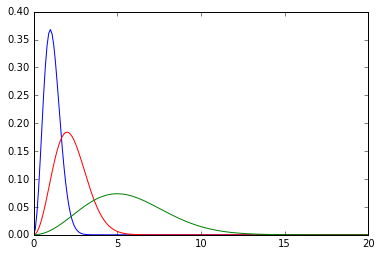

In [11]:
v = np.linspace(0,20,200)

dist1 = mb_v(v,T=1.0)
dist2 = mb_v(v,T=4.0)
dist3 = mb_v(v,T=25.0)

plt.plot(v,dist1, 'b')
plt.plot(v,dist2, 'r')
plt.plot(v,dist3, 'g')

## 2.3 Radiation temperature and Black Body spectrum

Can light have a temperature?

We have just said that temperature and energy are the same thing, since photons have energy, we can associate to them a certain temperature.

Also, photons can interact with other particles through EM interactions. They can therefore reach thermal equilibrium with any other system, and thus have a temperature.

A single photon carries a kinetic energy $U_K = h \nu$

A gas of photons in thermal equilibrium is called a black body, and its frequency distribution is called a black-body spectrum.

We need to use quantum mechanics to be able to find the shape of a black body energy density -actually this is how quantum physics started-, but it was firstly measured empirically:

$u_\nu (T) = \frac{8 \pi h \nu^3}{c^3} \frac{1}{\exp{\frac{h\nu}{k_BT}-1}}$

In astronomy, we usually use a related magnitude, the spectral radiance:

$B_\nu = \frac{c}{4\pi}u_\nu(T)$

In [12]:
import astropy.units as u
from astropy.analytic_functions import blackbody_lambda, blackbody_nu

        Use astropy.modeling.blackbody.blackbody_lambda instead. [astropy.utils.decorators]
        Use astropy.modeling.blackbody.blackbody_lambda instead.
        Use astropy.modeling.blackbody.blackbody_lambda instead. [astropy.utils.decorators]
        Use astropy.modeling.blackbody.blackbody_lambda instead.


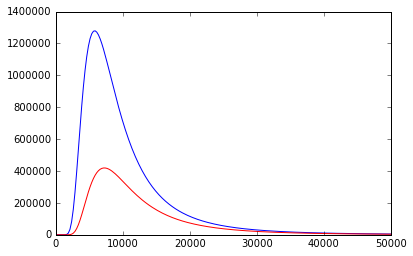

In [13]:
wavelengths = np.linspace(100, 50000, 200) * u.AA
flux_1 = blackbody_lambda(wavelengths, 5000*u.K)
flux_2 = blackbody_lambda(wavelengths, 4000*u.K)

plt.plot(wavelengths, flux_1, 'b')
plt.plot(wavelengths, flux_2, 'r')

        Use astropy.modeling.blackbody.blackbody_lambda instead. [astropy.utils.decorators]
        Use astropy.modeling.blackbody.blackbody_lambda instead.
        Use astropy.modeling.blackbody.blackbody_lambda instead. [astropy.utils.decorators]
        Use astropy.modeling.blackbody.blackbody_lambda instead.
        Use astropy.modeling.blackbody.blackbody_lambda instead. [astropy.utils.decorators]
        Use astropy.modeling.blackbody.blackbody_lambda instead.
/Users/jzorrilla/Programs/anaconda/lib/python2.7/site-packages/astropy/modeling/blackbody.py:300: RuntimeWarning: overflow encountered in expm1
  boltzm1 = np.expm1(log_boltz)
/Users/jzorrilla/Programs/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:1032: RuntimeWarning: overflow encountered in multiply
  return super(Quantity, self).__mul__(other)


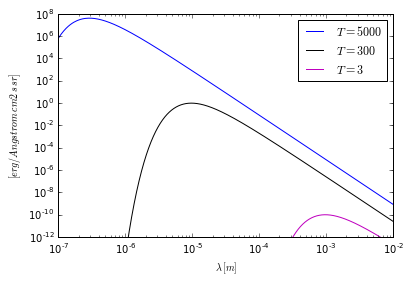

In [14]:
wavelengths = np.linspace(1e3, 1e8, 1e6) * u.AA
flux_1 = blackbody_lambda(wavelengths, 10000*u.K)
#flux_2 = blackbody_lambda(wavelengths, 5000*u.K)
#flux_3 = blackbody_lambda(wavelengths, 3000*u.K)
#flux_4 = blackbody_lambda(wavelengths, 1000*u.K)
flux_5 = blackbody_lambda(wavelengths, 300*u.K)
#flux_6 = blackbody_lambda(wavelengths, 100*u.K)
flux_7 = blackbody_lambda(wavelengths, 3*u.K)

plt.plot(wavelengths/1e10, flux_1, 'b', label='$T=5000$')
#plt.plot(wavelengths/1e10, flux_2, 'r')
#plt.plot(wavelengths/1e10, flux_3, 'g')
#plt.plot(wavelengths/1e10, flux_4, 'y')
plt.plot(wavelengths/1e10, flux_5, 'k', label='$T=300$')
#plt.plot(wavelengths/1e10, flux_6, 'c')
plt.plot(wavelengths/1e10, flux_7, 'm', label='$T=3$')

plt.ylim((1e-12, 1e8))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$\lambda \, [m]$')
plt.ylabel('$[erg/Angstrom \, cm2 \, s \, sr]$')
plt.legend()

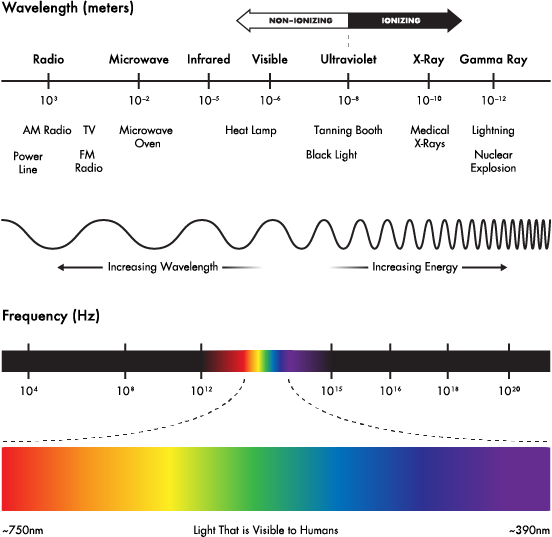

In [16]:
Image('spectrum.png')

# 3. Temperature in an expanding universe

The particles in charge of keeping others in equilibrium, for most of the early universe, are photons, since they are relativistic and we will see that there will be many more of these than of other non-relativistic particles. We saw how a gas of photons in equilibrium have a black body spectrum, with an energy density 

$u_\nu (T) = \frac{8 \pi h \nu^3}{c^3} \frac{1}{\exp{\frac{h\nu}{k_BT}-1}}$

which means that at a frequency $\nu$, the density of photons per unit of volume and frequency is then

$n_{\nu} = \frac{u_\nu}{h\nu} = \frac{8 \pi}{c^3} \frac{\nu^2}{\exp{\frac{h\nu}{k_BT}-1}}$

As the universe expands, the number density is diluted by $a^3$, and the frequency gets redshifted, so 

$n_\nu d\nu = n_{\nu^{'}}d\nu^{'}a^3$

$\frac{8 \pi}{c^3} \frac{\nu^2 d\nu}{\exp{\frac{h\nu}{k_BT}-1}} = \frac{8 \pi}{c^3} \frac{\nu^{'2} d\nu^{'}}{\exp{\frac{h\nu^{'}}{k_BT^{'}}-1}}a^3$

$\frac{\nu^2 d\nu}{\exp{\frac{h\nu}{k_BT}-1}} = \frac{\frac{\nu^{2}}{a^2} \frac{d\nu}{a}}{\exp{\frac{h\frac{\nu}{a}}{k_BT^{'}}-1}}a^3$

$\frac{\nu^2 d\nu}{\exp{\frac{h\nu}{k_BT}-1}} = \frac{\nu^{2} d\nu}{\exp{\frac{h\nu}{k_BT^{'}a}-1}}$

The gas of photons preserves the black body spectrum, with a new temperature

$T^{'} = \frac{T}{a}$

and so, as $a\rightarrow 0$, $T \rightarrow \infty$

# 4. Reactions

If a set of species are related by a reaction, and that reaction is in equilibrium, the component proportions are a function of the reaction's stechiometry:

$aA + bB \leftrightarrow cC + dD$

For a reaction to be in equilibrium, we need the rates for the direct and inverse reactions to be equal:

$Rate [ aA + bB \rightarrow cC + dD ] \equiv Rate[cC + dD \rightarrow aA + bB]$

We need then a way to determine the rate of a reaction

The rate of a reaction can be written as:

$\Gamma = n \cdot v \cdot \sigma$

where:

- $\Gamma$ is the reaction rate, its units are $[T^{-1}]$
- $n$ is the density of the reactants, its units are $[L^{-3}]$
- $v$ is the relative velocity of the reactants, its units are $[LT^{-1}]$
- $\sigma$ is the cross-section, a measurement of the relative strength of the interaction. Its units are $[L^2]$

## 4.1 Cross-sections 

It expresses the strenght of an interaction as an effective cross-area of a target, following a model of collisions:

- The cross-section for the collision of solid spheres of radius R is $\sigma = \pi R^2$

In general, the cross-section for a process will depend of:
1. The interaction involved
2. The particles involved
3. The energy of the particles involved

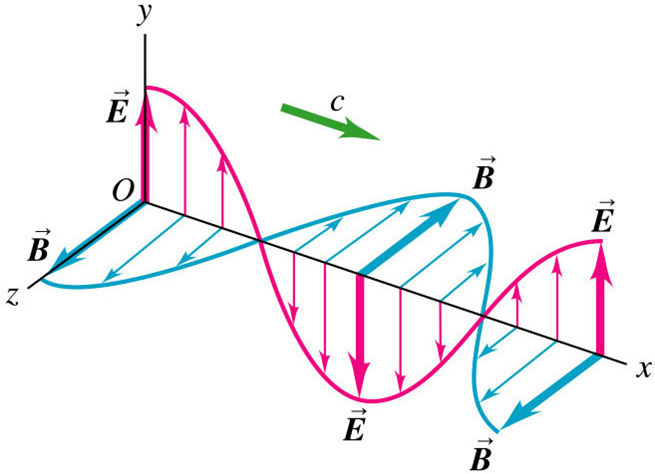

In [18]:
Image('EM-Plane-Waves.png')

The force experienced by the electron is then

$\vec{F} = e \vec{E} = m_e \ddot{y}$

The average power radiated by an accelerated charge -not derived here- per solid angle is

$\frac{dP}{d\Omega} = \frac{e^2<\ddot{y}^2>}{16\pi^2 \epsilon_0 c^3} \sin^2\theta = \left( \frac{e^2}{4 \pi \epsilon_0 m c^2}\right)^2 \frac{\epsilon_0 c E_0^2}{2} \sin^2\theta$

and the average incident power from the plane wave is

$<P> = \frac{\epsilon_0 c E_0^2}{2}$

So, the scattering cross section can be defined as:

$\frac{\sigma_T}{d\Omega} = \frac{\frac{dP}{d\Omega}}{<P>}$

and we can integrate along all directions:

$\sigma_T = \int_0^\pi 2\pi \sin\theta d\theta \left( \frac{e^2}{4 \pi \epsilon_0 m c^2}\right)^2  \sin^2\theta = ... =  \left( \frac{e^2}{4 \pi \epsilon_0 m c^2}\right)^2 \frac{8\pi}{3} \approx 0.66 \cdot 10^{-28} m^2$

## 4.2 Densities

The last element we need is how the density of particles depends on the temperature. For this, we need to know what is the number of particles in a given region of phase space around a position $\vec{x}$ and a momentum $\vec{p}$.

Based on Heisenberg's principle, no particle can be localized into a region smaller than $\left(2\pi\hbar\right)^3$, so the number of elementary phase space elements in a given volume is $\frac{d^3xd^3p}{\left(2\pi\hbar\right)^3}$. If we know how many particles do we have in a given region of phase space, that is, their distribution function $f(\vec{x}, \vec{p})$, then the energy density for species i is:

$\rho_i = g_i \int \frac{d^3p}{\left(2\pi\hbar\right)^3} f_i(\vec{x}, \vec{p}) E(p)$

$g_i$ is a factor, multiplicity, that tells us how many states of a particle are degenerate -i.e. have the same energy with different quantum state-.

Since we are assuming an homogeneous and isotropic universe, these distributions do not depend on position or direction of the momentum. 

Turns out fermions follow a Fermi-Dirac distribution:

$f_{FD} = \frac{1}{\exp{\frac{E-\mu}{kT}}+1}$

and bosons follow a Bose-Einstein distribution:

$f_{BE} = \frac{1}{\exp{\frac{E-\mu}{kT}}-1}$

$\mu$ is the chemical potential, which measures the change in energy of a system when particles are added/removed. In many instances it will be negligible, for instance, for bosons -like photons-, that can be easily created or destroyed.

Also, note that both distributions look very similar, except for a sign.

In some cases it is simple to do the numbers:

1. Cold particles: (non-relativistic) particles with a rest mass much larger than the characteristic energy scale, $mc^2 >> kT$:

$n_{cold} = \frac{g}{(2\pi\hbar)^3}\int d^3p f(p) = \frac{g}{(2\pi\hbar)^3}\int dp \frac{4\pi^2p^2}{\exp{\frac{E(p)}{kT}} \pm 1} 
\approx \frac{g}{2\pi^2\hbar^3}\int p^2 dp \exp{-\frac{E(p)}{kT}}$

$n_{cold} \approx \frac{g}{2\pi^2\hbar^3}\int p^2 dp \exp{-\frac{\sqrt{(mc^2)^2 + p^2}}{kT}} 
\approx \frac{g}{2\pi^2\hbar^3}\exp{-\frac{(mc^2)}{kT}}\int p^2 dp 
\approx \frac{g}{2\pi^2\hbar^3}\exp{-\frac{(mc^2)}{kT}} \frac{p^3}{3}$

$n_{cold}\propto T^{3/2} \exp{-\frac{(mc^2)}{kT}} $

2. Hot particles: (relativistic) particles with a rest mass much lower than the characteristic energy scale, $mc^2 << kT$:

$n_{hot} = \frac{g}{(2\pi\hbar)^3}\int d^3p f(p) = \frac{g}{(2\pi\hbar)^3}\int dp \frac{4\pi^2p^2}{\exp{\frac{E(p)}{kT}} \pm 1} 
\approx \frac{g}{2\pi^2\hbar^3}\int dp \frac{p^2}{\exp{\frac{pc}{kT}} \pm 1}$ 

$n_{hot}\approx \frac{g}{2\pi^2\hbar^3}\int \frac{kT}{c}d\chi \frac{\left(\frac{kT}{c}\right)^2\chi^2}{\exp{\chi} \pm 1}
\approx \frac{g}{2\pi^2\hbar^3}\left(\frac{kT}{c}\right)^3\int d\chi \frac{\chi^2}{\exp{\chi} \pm 1} \propto T^3$

Note that in general, $n_{hot}>>n_{cold}$

## 4.3 Characteristic times

The expansion of the universe tends to go against any reaction, since it pulls the reactants apart. If the characteristic time for a reaction to happen is much faster than the characteristic time for the expansion, the size of the universe will be ~constant during that time, and the reaction will take place. 

If, on the other hand, the characteristic time for the reaction is too slow, by the time it should have happened, the universe will have expanded and taken the reactants away. The reaction will not take place.

The characteristic time for a reaction is just the inverse of its rate:

$\tau = \frac{1}{\Gamma} = \frac{1}{n(T)v(T)\sigma(T)}$

The characteristic time for the expansion, is the time it takes for the universe to experience a change in size of the same order of magnitude of its own size

$\Delta a \approx a$

$\frac{\Delta a}{\Delta t} \approx \frac{a}{\Delta t}$

$\dot a \approx \frac{a}{\Delta t}$

$\frac{\dot a}{a} \approx \frac{1}{\Delta t}$

$H(a) \approx \frac{1}{\Delta t}$

So, if $\tau >> \frac{1}{H}$, the reaction will become inefficient.

As the universe expands, its temperature decreases as 1a, to the reaction rates decrease and their τ increase. At the same time, H decreases but not as fast as the rates, so at some point any reaction becomes inefficient and stops happening.

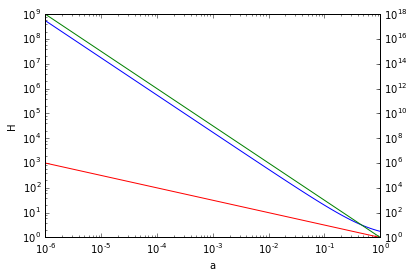

In [23]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
a = np.logspace(-6,0,100)
z = 1/a

fig = plt.figure()
ax = fig.add_subplot(111)
axbis = ax.twinx()
ax.plot(a,cosmo.efunc(z))
axbis.plot(a,1/a,'r')
axbis.plot(a,(1/a)**3,'g')
#axbis.plot(a,(1/a)**3*np.exp(1/a),'k')
axbis.set_yscale('log')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('a')
ax.set_ylabel('H')

At any point in history, we will have:
- A set of species coupled by reactions, in thermal equilibrium -same T-
- A set of decoupled species which evolve independently, diluting at a different rate if they're hot or cold

Photons have:
- The highest speed -c-
- A large cross-section -they experience EM interactions-
- The highest number density -$\propto T^3$-
As a result, they're the las species to decouple, and will be the reference for temperature

# 5. Neutrinos leave the party early

Neutrinos can scatter off electrons through the weak force, but do so with a ridiculously small cross-section

$\nu + e^- \leftrightarrow \nu + e^-, \, \sigma_{\nu e}\approx 10^{-48}\left(\frac{E_\nu}{1 MeV}\right) [m^2]$

As a result, their characteristic time becomes comparable to the Hubble time for $E_{\nu}\approx 1 MeV$, $T\approx10^{10}K$ or $t\approx 0.5 s$. From then on, they decouple and evolve independently, with a temperature:

$kT_{\nu}(a) = 1MeV\frac{a(1 MeV)}{a}$

In the ultrarrelativistic limit, the neutrinos get redshifted the same way as photons, and even though they are decoupled, they should cool down at the same rate and share their temperature with the photons. Nevertheless, by the time the neutrinos decoupled, there were still electrons and positrons anihilating themselves and heating the photon gas, so the temperatures for both backgrounds (neutrinos and photons) have a different temperature.

Turns out that

$T_{\gamma} = \left( \frac{11}{4}\right)^{1/3} T_\nu$

This cosmic neutrino background, CNB, has then a temperature of 1.98 K ($10^{-4} eV$), and has not been detected (we can only detect neutrinos with $T>1 keV$)

We can detect them indirectly, as we will see in the next lecture, due to their effect on the growth of structure.

# 6. Nucleosynthesis, or how a lucky accident enabled chemistry

After neutrino scattering becomes inefficient, neutrinos still interact with the other particles -not fast enough to keep them in equilibrium, though-

$n + e^+ \leftrightarrow p + \bar{\nu}_e$

$n + \nu_e \leftrightarrow p + e^-$

$n \leftrightarrow p + e^- + \bar{\nu}_e$

Look at the last reaction, it is not a collision, but a decay reaction. If we leave things as they're neutrons will decay into protons and electrons. This reaction can happen because $m_n > m_p + m_e$. The mean life time of a netron is ~15 min. If nothing else happens, after a while neutrons will all decay -> no heavier nuclei than hydrogen -> no multielectron atoms -> no chemistry -> no Kardashians.

The number density of a particle depends on its initial density, the expansion of the universe and its interactions with other particles, for instance, given:

$1+2\leftrightarrow 3+4$

$\frac{dn_1}{dt} + 3Hn_1 = n_1^0n_2^0<\sigma_{12}>\left[\frac{n_3n_4}{n_3^0n_4^0}-\frac{n_1n_2}{n_1^0n_2^0}\right]$

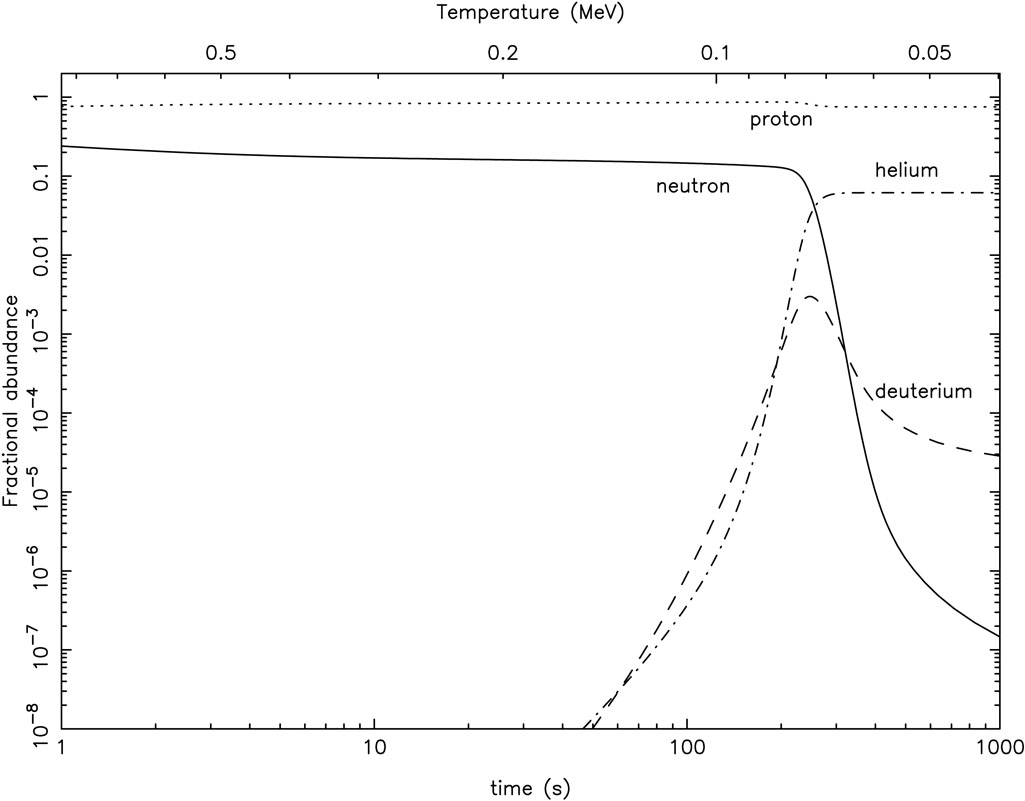

In [25]:
Image('BBN.jpg')

At equilibrium, we have for the reaction

$p+n\leftrightarrow D+\gamma$


$\frac{n_D}{n_n+n_p}=\frac{3}{4}\left(\frac{m_Dh^2}{2\pi k_Bm_nm_pT}\right)^{3/2}\exp{(m_n+m_p-m_D)c^2/k_BT}$

and the ratio becomes of order unity for T~0.07 MeV (binding energy of 2 MeV)

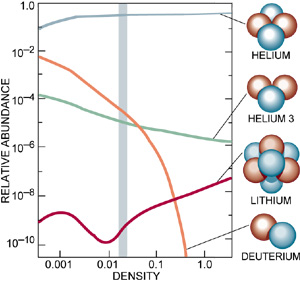

In [28]:
Image('altbbn.jpg')

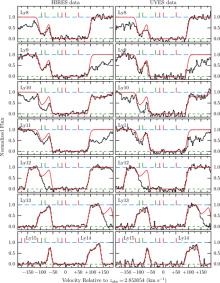

In [30]:
Image('cookeetal-1607-03900_f4.jpg')

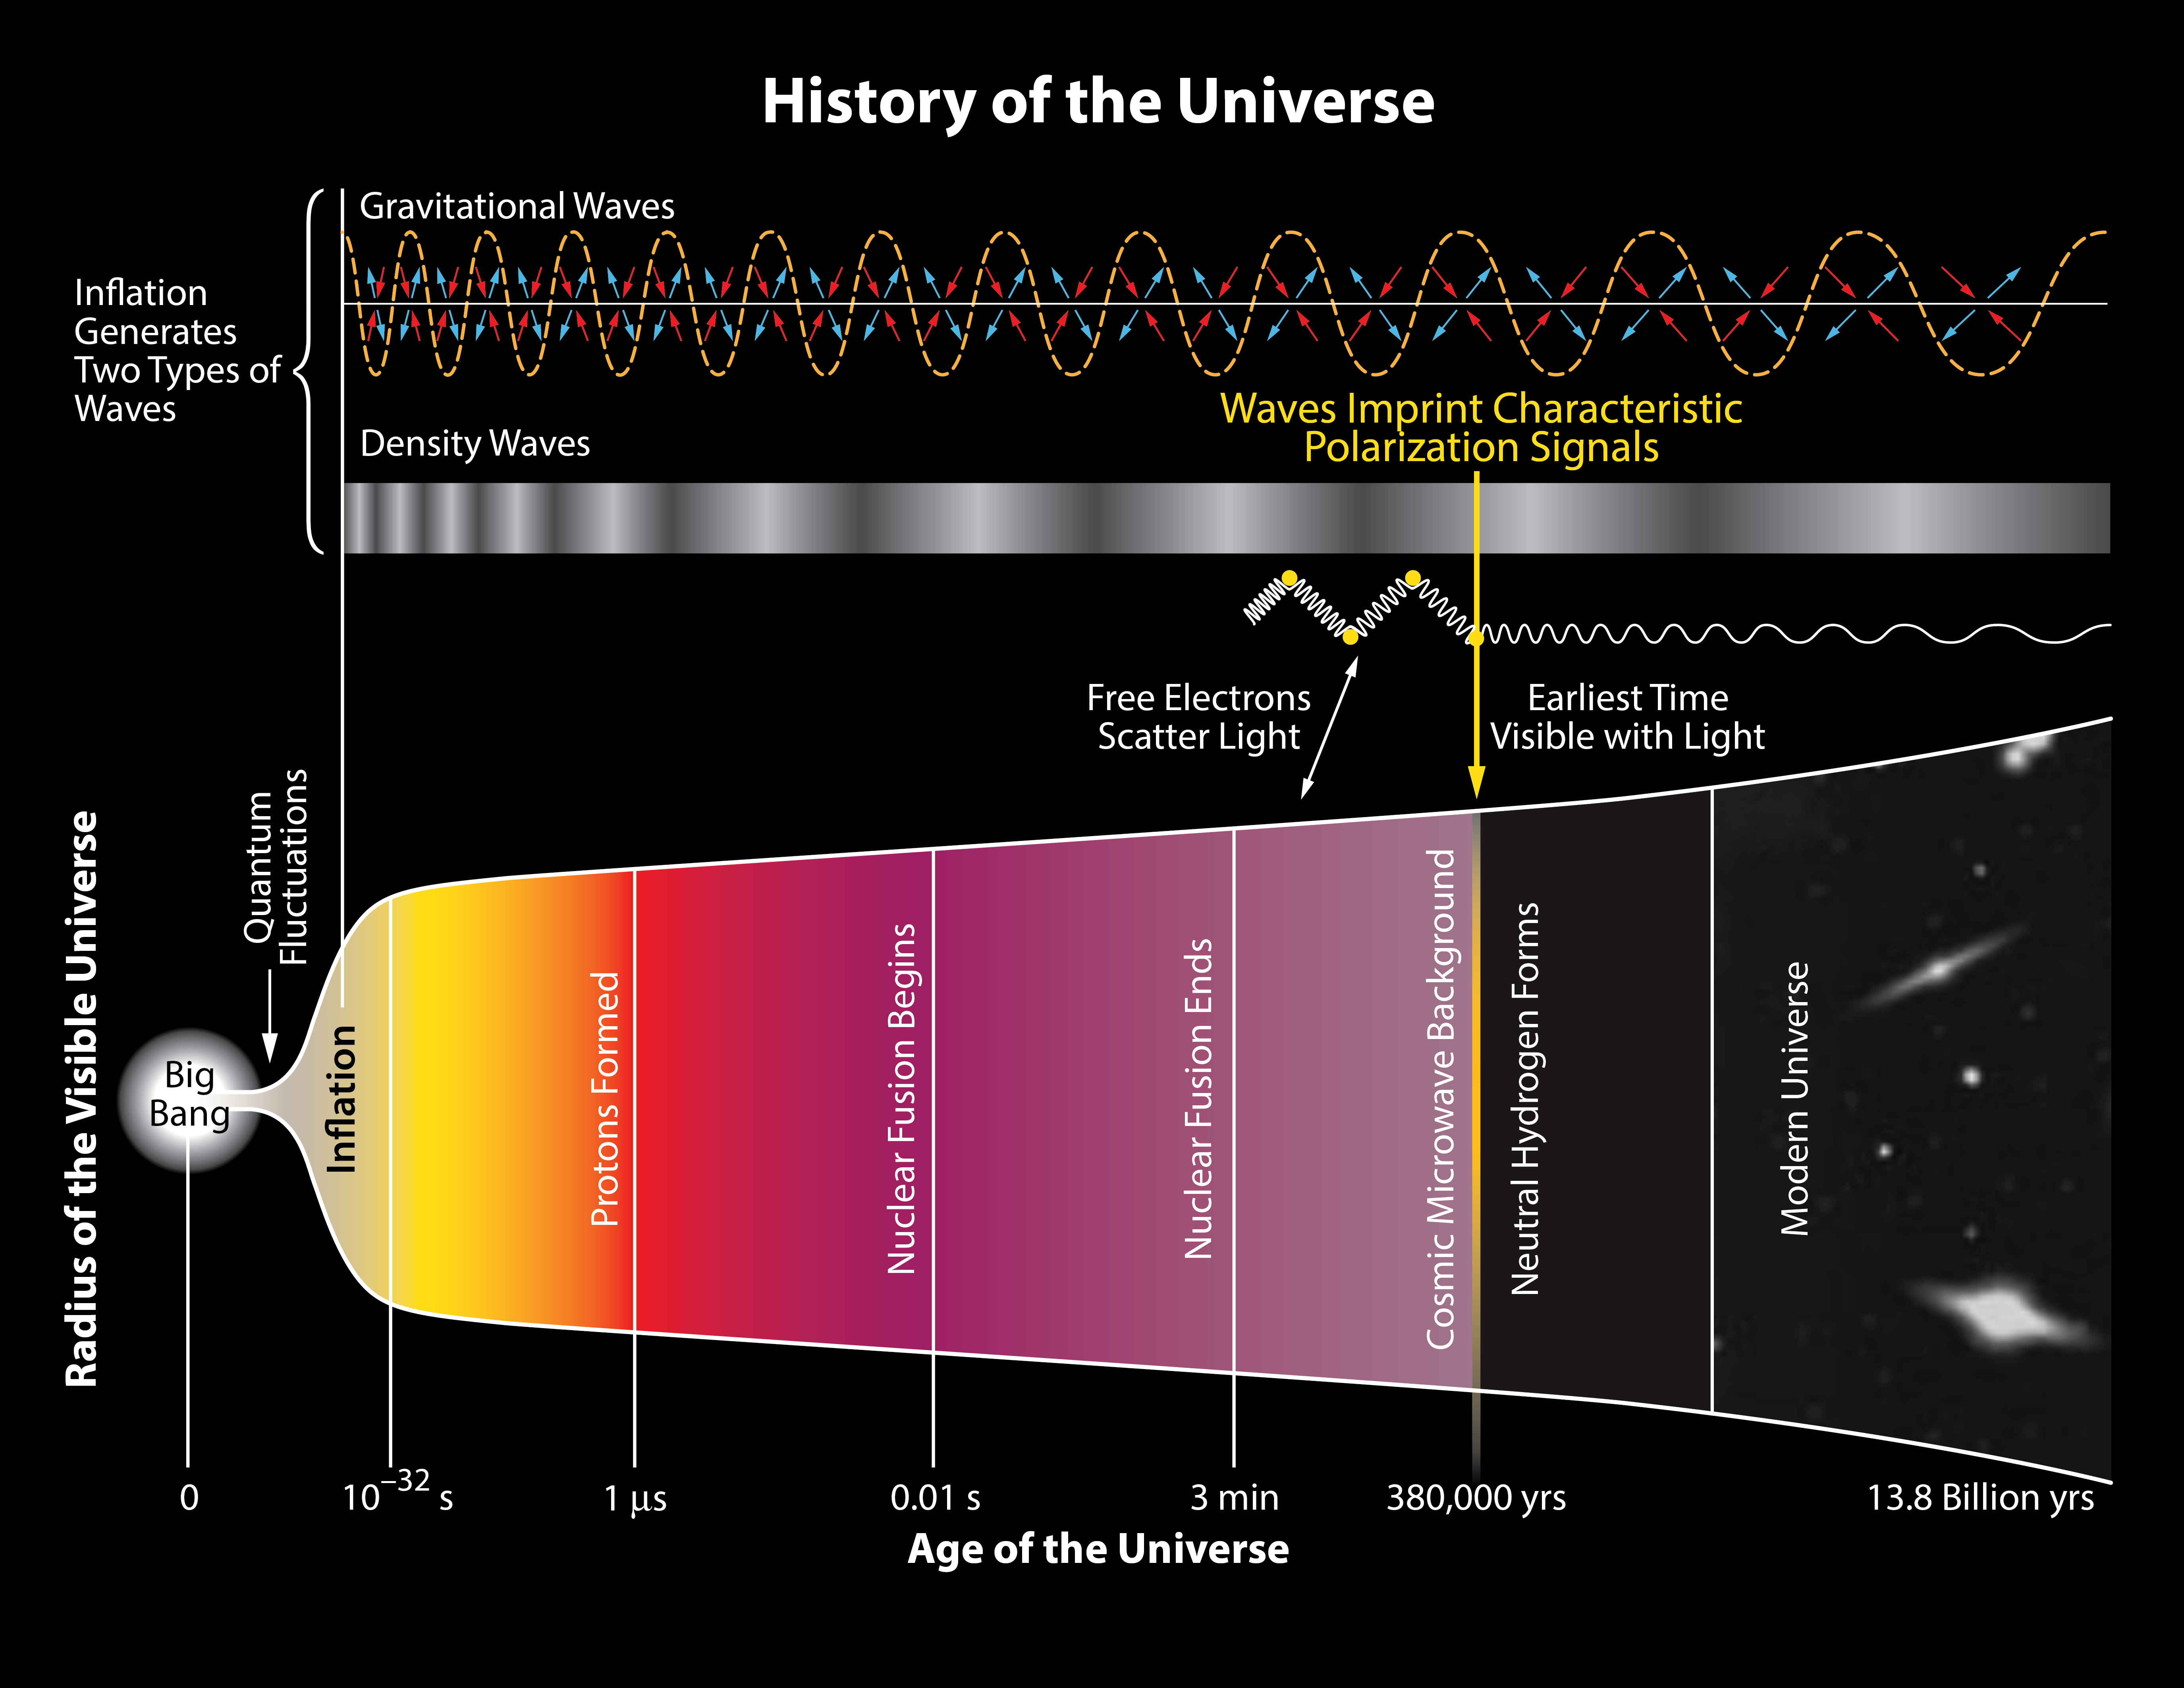

In [31]:
Image('history-of-the-universe-bicep2.jpg')